# Modeling

In [60]:
pip install statsmodels==0.14.4


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install linearmodels


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Generalized Linear Models (GLMs)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm

# Non-Parametric Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


# Model Evaluation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [63]:
data = pd.read_csv('Question 1. Data.csv')
data

,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month_sin,month_cos,month_2,month_3,month_4,month_5,month_6,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2760,26.0,27.4,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1071,15.8,16.0,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4659,24.8,26.1,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,976,18.8,19.4,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,635,28.0,29.0,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,3356,73.8,70.5,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12476,1400,68.1,64.3,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12477,27435,77.9,74.2,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12478,5108,70.0,64.3,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Separate target variable (y) and features (X)
y = data['electricity_sales']  # Extract target variable
X = data.drop(columns=['electricity_sales'])  # Drop target variable to create feature matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42 )

### Random Sample Prediction
Training a Random Sample from a Train/Test Split Data Set defined above. In reality, we won't want to predict past months but the future. The following is just an excercise. Later, we will predict the next year based on the previous information.

In [10]:
# Add a constant to X_train for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y_train, X_train_sm).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      electricity_sales   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4666.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:04:51   Log-Likelihood:                -69707.
No. Observations:                8361   AIC:                         1.395e+05
Df Residuals:                    8299   BIC:                         1.400e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [11]:
train_pred = model.predict(X_train_sm)
train_pred = pd.DataFrame(train_pred)
train_pred.rename({0: 'train_prediction'}, axis= 1, inplace = True)

In [12]:
test_pred = model.predict(X_test_sm)
test_pred = pd.DataFrame(test_pred)
test_pred.rename({0: 'test_prediction'}, axis= 1, inplace = True)

In [15]:
pre_data = pd.read_csv('Data Pre Feature Engineering.csv').drop(['month_sin', 'month_cos'], axis = 1)
pre_data

,state,date,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month
0,Connecticut,2001-01-01,2760,26.0,27.4,1
1,Maine,2001-01-01,1071,15.8,16.0,1
2,Massachusetts,2001-01-01,4659,24.8,26.1,1
3,New Hampshire,2001-01-01,976,18.8,19.4,1
4,Rhode Island,2001-01-01,635,28.0,29.0,1
...,...,...,...,...,...,...
12475,Utah,2022-08-01,3356,73.8,70.5,8
12476,Wyoming,2022-08-01,1400,68.1,64.3,8
12477,California,2022-08-01,27435,77.9,74.2,8
12478,Oregon,2022-08-01,5108,70.0,64.3,8


In [16]:
random_sample_prediction = pd.concat([pre_data, train_pred, test_pred], axis = 1, ignore_index=False)
random_sample_prediction

,state,date,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month,train_prediction,test_prediction
0,Connecticut,2001-01-01,2760,26.0,27.4,1,NaN,2538.569758
1,Maine,2001-01-01,1071,15.8,16.0,1,1319.261119,NaN
2,Massachusetts,2001-01-01,4659,24.8,26.1,1,4576.459969,NaN
3,New Hampshire,2001-01-01,976,18.8,19.4,1,NaN,1165.700430
4,Rhode Island,2001-01-01,635,28.0,29.0,1,555.842473,NaN
...,...,...,...,...,...,...,...,...
12475,Utah,2022-08-01,3356,73.8,70.5,8,3587.206755,NaN
12476,Wyoming,2022-08-01,1400,68.1,64.3,8,2418.122615,NaN
12477,California,2022-08-01,27435,77.9,74.2,8,23158.047197,NaN
12478,Oregon,2022-08-01,5108,70.0,64.3,8,NaN,5741.040724


In [17]:
hue_order = random_sample_prediction['state'].sort_values().unique()
hue_order

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

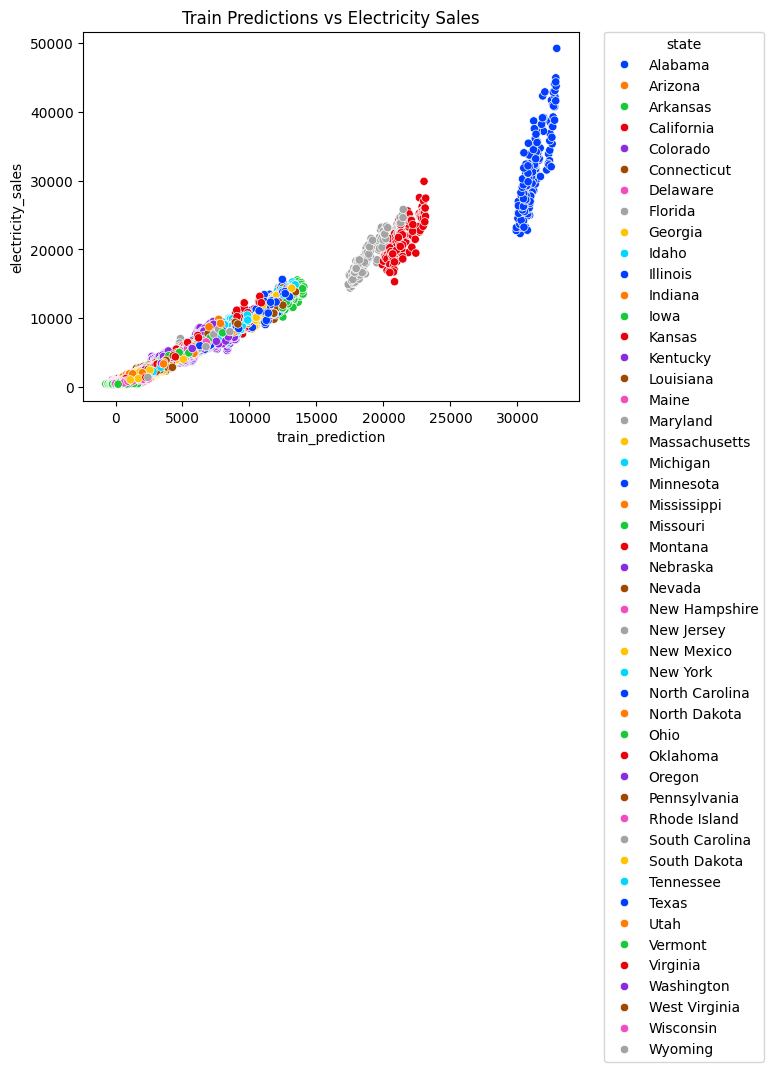

In [18]:
random_sample_prediction_test = random_sample_prediction[~random_sample_prediction['test_prediction'].isna()]
# random_sample_prediction_test

random_sample_prediction_train = random_sample_prediction[~random_sample_prediction['train_prediction'].isna()]




# Plotting Train Predictions
sns.scatterplot(data = random_sample_prediction_train, x = 'train_prediction', y = 'electricity_sales', hue= 'state', palette='bright', hue_order= hue_order)

plt.legend(
    title="state",
    bbox_to_anchor=(1.05, 1),  # Moves the legend outside the plot
    loc='upper left',          # Sets the anchor position
    borderaxespad=0            # Reduces space between plot and legend
)

# Add labels and a title if necessary
plt.xlabel("train_prediction")
plt.ylabel("electricity_sales")
plt.title("Train Predictions vs Electricity Sales")

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

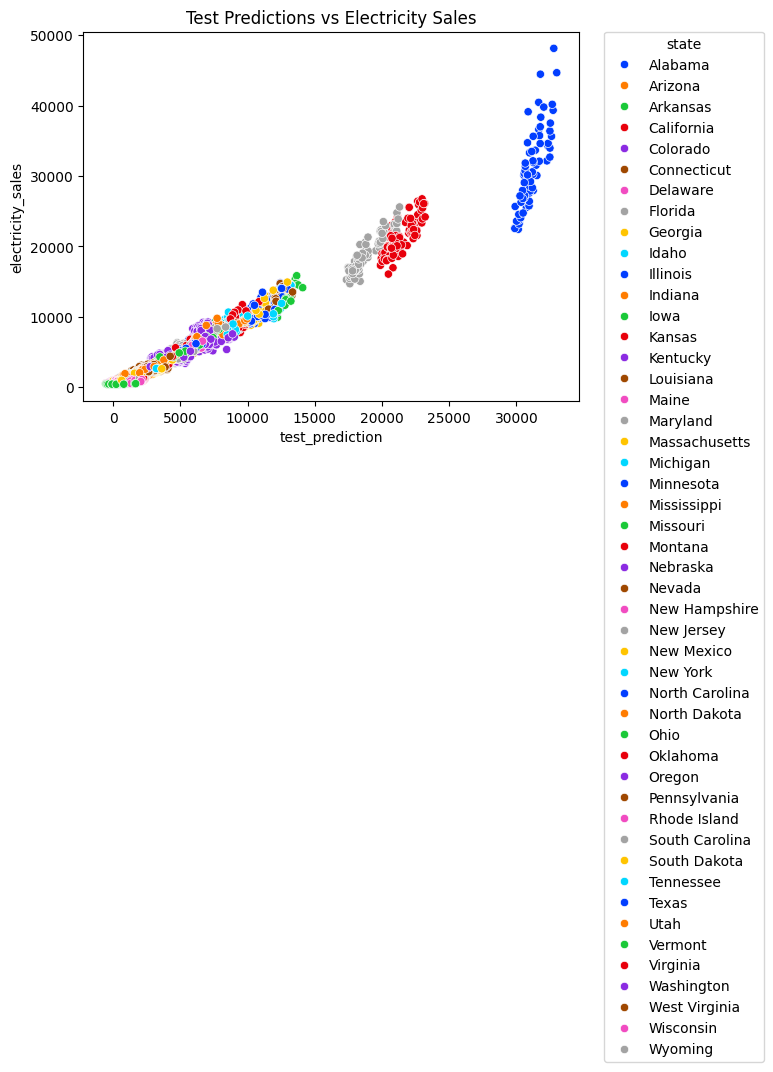

In [19]:
sns.scatterplot(data = random_sample_prediction_test, x = 'test_prediction', y = 'electricity_sales', hue= 'state', palette='bright', hue_order= hue_order )

plt.legend(
    title="state",
    bbox_to_anchor=(1.05, 1),  # Moves the legend outside the plot
    loc='upper left',          # Sets the anchor position
    borderaxespad=0            # Reduces space between plot and legend
)

# Add labels and a title if necessary
plt.xlabel("test_prediction")
plt.ylabel("electricity_sales")
plt.title("Test Predictions vs Electricity Sales")

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Last Year Prediction
Here we are imitating reality. We will train various models based on data up to 2021 and will predict **'electricity sales'** for 2022.

**Models used**

GLMs:
- Linear Regression
- Ridge Linear Regression
- Lasso Linear Regression


Non-Parametric Methods:
- SVR (Support Vector Machine Regressor)
- Random Forest
- K-Nearest-Neighbors
- Neural Networks

#### Normalizing Continuous Variables
- Average Temperature
- monthly_mean_from_1901_to_2000

In [20]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize the selected columns
data[['average_temp', 'monthly_mean_from_1901_to_2000']] = scaler.fit_transform(
    data[['average_temp', 'monthly_mean_from_1901_to_2000']]
)

# Check the result
print(data[['average_temp', 'monthly_mean_from_1901_to_2000']].head())

   average_temp  monthly_mean_from_1901_to_2000
0     -1.584972                       -1.395322
1     -2.184504                       -2.058572
2     -1.655505                       -1.470956
3     -2.008171                       -1.860761
4     -1.467416                       -1.302235


#### Split Data Sets by Year

In [21]:
# Convert the 'date' column to datetime
pre_data['date'] = pd.to_datetime(pre_data['date'])

data['year'] = pre_data['date'].dt.year
data

,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month_sin,month_cos,month_2,month_3,month_4,month_5,month_6,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,year
0,2760,-1.584972,-1.395322,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
1,1071,-2.184504,-2.058572,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
2,4659,-1.655505,-1.470956,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
3,976,-2.008171,-1.860761,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
4,635,-1.467416,-1.302235,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,3356,1.224600,1.112228,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12476,1400,0.889567,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022
12477,27435,1.465588,1.327493,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12478,5108,1.001245,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022


In [22]:
train = data[data['year'] < 2022]
test = data[data['year'] == 2022]
test

,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month_sin,month_cos,month_2,month_3,month_4,month_5,month_6,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,year
12096,2615,-1.314595,-1.401140,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12097,1163,-2.078704,-2.058572,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12098,4442,-1.367494,-1.470956,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12099,1024,-1.825960,-1.860761,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12100,639,-1.179406,-1.296417,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,3356,1.224600,1.112228,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12476,1400,0.889567,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022
12477,27435,1.465588,1.327493,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022
12478,5108,1.001245,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022


In [23]:
X_train = train.drop(columns=['electricity_sales', 'year'])  # Drop target and unnecessary variables to create feature matrix
y_train = train['electricity_sales']  # Extract target variable

X_test = test.drop(columns=['electricity_sales', 'year'])  # Drop target and unnecessary variables to create feature matrix
y_test = test['electricity_sales']  # Extract target variable

In [24]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def model_evaluation(models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, n_bootstraps=1000, alpha=0.05):
    """
    Evaluate a dictionary of regression models on training and testing datasets.

    Parameters:
    ----------
    models : dict
        Dictionary of models where keys are model names (strings) and values are sklearn-like regressors.
    X_train : array-like, shape (n_samples, n_features)
        Feature matrix for training the models.
    y_train : array-like, shape (n_samples,)
        Target vector for training the models.
    X_test : array-like, shape (n_samples, n_features)
        Feature matrix for testing the models.
    y_test : array-like, shape (n_samples,)
        Target vector for testing the models.
    n_bootstraps : int, optional, default=1000
        Number of bootstrap samples for estimating confidence intervals.
    alpha : float, optional, default=0.05
        Significance level for confidence intervals (default 95%).

    Returns:
    -------
    pd.DataFrame
        A DataFrame summarizing evaluation metrics (RMSE, R², MAE, MAPE, confidence intervals) for each model.

    Outputs:
    -------
    Prints detailed evaluation results for each model, including RMSE, R², MAE, MAPE, and confidence intervals.
    """

    # Dictionary to store evaluation results
    results = {}

    # Train, predict, and evaluate each model
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error

        # Bootstrap Confidence Interval for Predictions
        bootstrap_preds = []
        for _ in range(n_bootstraps):
            X_resampled, y_resampled = resample(X_test, y_test)
            bootstrap_preds.append(model.predict(X_resampled))
        bootstrap_preds = np.array(bootstrap_preds)

        lower_ci = np.percentile(bootstrap_preds, alpha / 2 * 100, axis=0)
        upper_ci = np.percentile(bootstrap_preds, (1 - alpha / 2) * 100, axis=0)

        # Store the results
        results[model_name] = {
            "RMSE": rmse,
            "R²": r2,
            "MAE": mae,
            "MAPE (%)": mape,
            "Lower CI (95%)": lower_ci.mean(),  # Averaging CI bounds across predictions
            "Upper CI (95%)": upper_ci.mean(),
        }

        print(f"{model_name} Results:")
        print(f"  Root Mean Squared Error: {rmse:.2f}")
        print(f"  R² Score: {r2:.2f}")
        print(f"  Mean Absolute Error: {mae:.2f}")
        print(f"  Mean Absolute Percentage Error: {mape:.2f}%")
        print(f"  Confidence Interval (95%): Lower={lower_ci.mean():.2f}, Upper={upper_ci.mean():.2f}")
        print("-" * 30)

    # Display evaluation summary
    print("\nSummary of Results:")
    for model_name, metrics in results.items():
        print(f"{model_name}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R²']:.2f}, "
              f"MAE = {metrics['MAE']:.2f}, MAPE = {metrics['MAPE (%)']:.2f}%, "
              f"95% CI = [{metrics['Lower CI (95%)']:.2f}, {metrics['Upper CI (95%)']:.2f}]")

    return pd.DataFrame(results).T

In [25]:

# Dictionary to store evaluation results
linear_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Linear Regression": Lasso(alpha=1.0),  # alpha is the regularization strength
    "Ridge Linear Regression": Ridge(alpha=1.0),   # alpha is the regularization strength
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Mix of Lasso (L1) and Ridge (L2)
}

# model_evaluation(linear_models)

### Model Evaluation for non-parametric methods

In [28]:
# Initialize non-parametric models
non_parametric_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regression": SVR(kernel='linear', C=1.0, epsilon=0.1),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Neural Network (MLP)": MLPRegressor(
        hidden_layer_sizes=(64, 32, 16),  # Three layers with 64, 32, and 16 neurons
        activation='relu',               # Activation function
        solver='adam',                   # Optimizer
        alpha=0.001,                     # Regularization strength
        learning_rate='adaptive',        # Adjust learning rate dynamically
        max_iter=500,                    # Maximum number of iterations
        random_state=42                  # Random state for reproducibility
    )

}

# model_evaluation(non_parametric_models)

# Summary of Results

- These are the results for the prediction on the test set.
- Uncertainty Quantification has been added through a Frequentist Approach: Confidence Intervals through Bootstrapping

In [27]:
results_summary = pd.concat([model_evaluation(linear_models), model_evaluation(non_parametric_models)])
results_summary

Training Linear Regression...
Linear Regression Results:
  Root Mean Squared Error: 1732.88
  R² Score: 0.94
  Mean Absolute Error: 800.01
  Mean Absolute Percentage Error: 17.77%
  Confidence Interval (95%): Lower=680.55, Upper=23683.55
------------------------------
Training Lasso Linear Regression...
Lasso Linear Regression Results:
  Root Mean Squared Error: 1756.61
  R² Score: 0.93
  Mean Absolute Error: 797.36
  Mean Absolute Percentage Error: 17.47%
  Confidence Interval (95%): Lower=687.40, Upper=23303.17
------------------------------
Training Ridge Linear Regression...
Ridge Linear Regression Results:
  Root Mean Squared Error: 1748.67
  R² Score: 0.94
  Mean Absolute Error: 795.71
  Mean Absolute Percentage Error: 17.68%
  Confidence Interval (95%): Lower=702.19, Upper=23376.30
------------------------------
Training ElasticNet Regression...
ElasticNet Regression Results:
  Root Mean Squared Error: 6331.17
  R² Score: 0.15
  Mean Absolute Error: 3940.47
  Mean Absolute Perce

,RMSE,R²,MAE,MAPE (%),Lower CI (95%),Upper CI (95%)
Linear Regression,1732.879517,0.936610,800.011068,17.768670,680.550985,23683.545589
Lasso Linear Regression,1756.612519,0.934861,797.359061,17.469625,687.401399,23303.174501
Ridge Linear Regression,1748.671308,0.935449,795.712486,17.679576,702.187342,23376.299457
ElasticNet Regression,6331.171143,0.153837,3940.468287,132.316981,3588.937668,8620.171346
Random Forest,664.651543,0.990674,313.444297,4.161858,568.823950,25373.056845
K-Nearest Neighbors,816.190613,0.985937,355.181771,4.615569,566.686927,25487.451120
Support Vector Regression,6680.388662,0.057916,3808.252170,96.334940,2459.297221,7001.277454
Gradient Boosting Regression,1865.511989,0.926535,1517.422006,48.607641,2121.612206,22705.868704
Neural Network (MLP),514.959198,0.994402,254.670050,4.474691,659.920822,26174.132488


In [32]:
results_summary

,RMSE,R²,MAE,MAPE (%),Lower CI (95%),Upper CI (95%)
Linear Regression,1732.879517,0.936610,800.011068,17.768670,680.550985,23683.545589
Lasso Linear Regression,1756.612519,0.934861,797.359061,17.469625,687.401399,23303.174501
Ridge Linear Regression,1748.671308,0.935449,795.712486,17.679576,702.187342,23376.299457
ElasticNet Regression,6331.171143,0.153837,3940.468287,132.316981,3588.937668,8620.171346
Random Forest,664.651543,0.990674,313.444297,4.161858,568.823950,25373.056845
K-Nearest Neighbors,816.190613,0.985937,355.181771,4.615569,566.686927,25487.451120
Support Vector Regression,6680.388662,0.057916,3808.252170,96.334940,2459.297221,7001.277454
Gradient Boosting Regression,1865.511989,0.926535,1517.422006,48.607641,2121.612206,22705.868704
Neural Network (MLP),514.959198,0.994402,254.670050,4.474691,659.920822,26174.132488


In [33]:
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # Three layers with 64, 32, and 16 neurons
    activation='relu',               # Activation function
    solver='adam',                   # Optimizer
    alpha=0.001,                     # Regularization strength
    learning_rate='adaptive',        # Adjust learning rate dynamically
    max_iter=500,                    # Maximum number of iterations
    random_state=42,                  # Random state for reproducibility
    verbose = 2
)

model.fit(X = X_train , y = y_train)

Iteration 1, loss = 37574781.28631192
Iteration 2, loss = 37256886.52918776
Iteration 3, loss = 35152931.29963116
Iteration 4, loss = 28641941.71772508
Iteration 5, loss = 19348692.69438505
Iteration 6, loss = 14227881.07618216
Iteration 7, loss = 12294792.76866801
Iteration 8, loss = 10827227.80746008
Iteration 9, loss = 9412867.59244562
Iteration 10, loss = 8006906.23466060
Iteration 11, loss = 6643667.90092817
Iteration 12, loss = 5405927.48627892
Iteration 13, loss = 4343997.17310805
Iteration 14, loss = 3472323.52495844
Iteration 15, loss = 2800818.06759221
Iteration 16, loss = 2279200.92634443
Iteration 17, loss = 1881681.84203797
Iteration 18, loss = 1570338.05245448
Iteration 19, loss = 1320498.64388772
Iteration 20, loss = 1121073.92257975
Iteration 21, loss = 960844.37981596
Iteration 22, loss = 833648.07674878
Iteration 23, loss = 730949.35879145
Iteration 24, loss = 648152.26949407
Iteration 25, loss = 580694.46385970
Iteration 26, loss = 527561.15995630
Iteration 27, loss 

MLPRegressor(alpha=0.001, hidden_layer_sizes=(64, 32, 16),
             learning_rate='adaptive', max_iter=500, random_state=42,
             verbose=2)

In [34]:
X_test

,average_temp,monthly_mean_from_1901_to_2000,month_sin,month_cos,month_2,month_3,month_4,month_5,month_6,month_7,...,state_South Dakota,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
12096,-1.314595,-1.401140,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12097,-2.078704,-2.058572,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12098,-1.367494,-1.470956,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12099,-1.825960,-1.860761,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12100,-1.179406,-1.296417,0.500000,0.866025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,1.224600,1.112228,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12476,0.889567,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12477,1.465588,1.327493,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12478,1.001245,0.751513,-0.866025,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

predictions = np.append(train_pred, test_pred)
predictions

array([ 2779.79856427,  1115.08105119,  4708.62070626, ...,
       26754.75487453,  5103.85606499,  7539.43547667])

In [36]:
data_results = pre_data.copy()
data_results['year'] = pd.to_datetime(data_results['date']).dt.year
data_results['NN Predictions'] = predictions
data_results['Test Set'] = data_results['year'] == 2022
data_results

,state,date,electricity_sales,average_temp,monthly_mean_from_1901_to_2000,month,year,NN Predictions,Test Set
0,Connecticut,2001-01-01,2760,26.0,27.4,1,2001,2779.798564,False
1,Maine,2001-01-01,1071,15.8,16.0,1,2001,1115.081051,False
2,Massachusetts,2001-01-01,4659,24.8,26.1,1,2001,4708.620706,False
3,New Hampshire,2001-01-01,976,18.8,19.4,1,2001,961.119065,False
4,Rhode Island,2001-01-01,635,28.0,29.0,1,2001,671.673893,False
...,...,...,...,...,...,...,...,...,...
12475,Utah,2022-08-01,3356,73.8,70.5,8,2022,3390.707659,True
12476,Wyoming,2022-08-01,1400,68.1,64.3,8,2022,1343.474571,True
12477,California,2022-08-01,27435,77.9,74.2,8,2022,26754.754875,True
12478,Oregon,2022-08-01,5108,70.0,64.3,8,2022,5103.856065,True


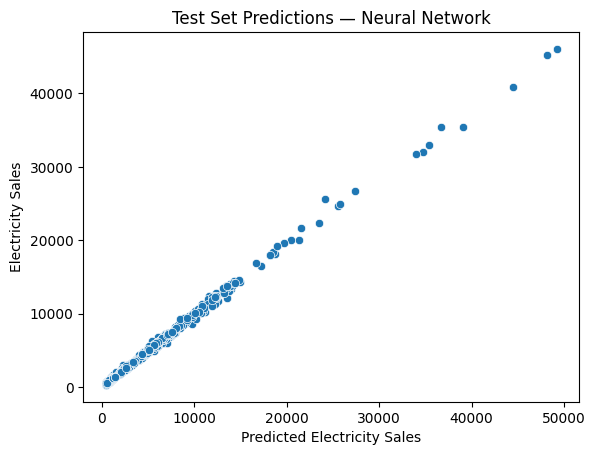

In [37]:
sns.scatterplot(data = data_results[data_results['Test Set'] == True], x = 'electricity_sales', y = 'NN Predictions')
plt.title('Test Set Predictions — Neural Network', )
plt.xlabel('Predicted Electricity Sales')
plt.ylabel('Electricity Sales')
plt.show()

Text(0, 0.5, 'Electricity Sales')

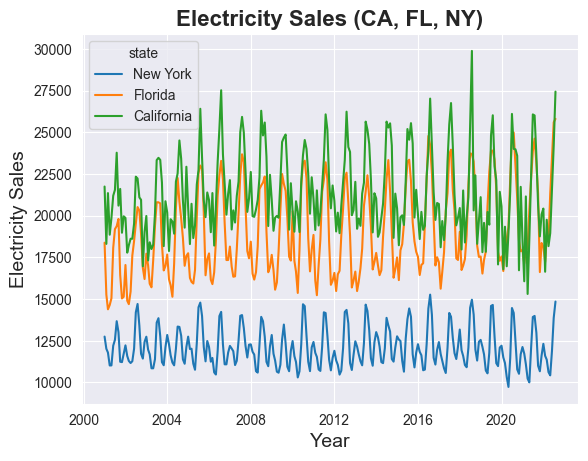

In [64]:
sns.lineplot(data = data_results[data_results['state'].isin(['New York', 'California', 'Florida'])], x = 'date', y = 'electricity_sales', hue='state')

plt.title( 'Electricity Sales (CA, FL, NY)', fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Sales", fontsize=14)


<Axes: xlabel='date', ylabel='NN Predictions'>

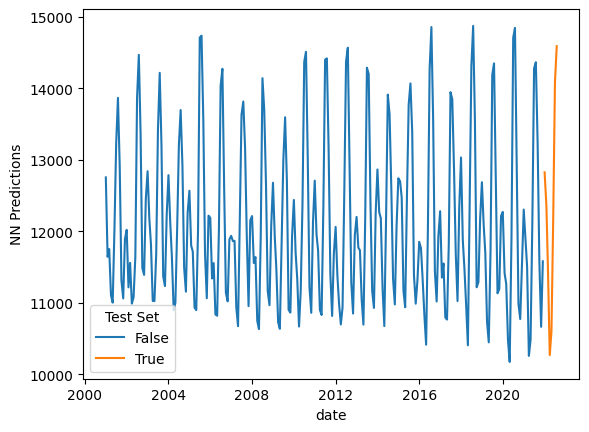

In [39]:
sns.lineplot(data = data_results[data_results['state'].isin(['New York'])], x = 'date', y = 'NN Predictions', hue='Test Set')

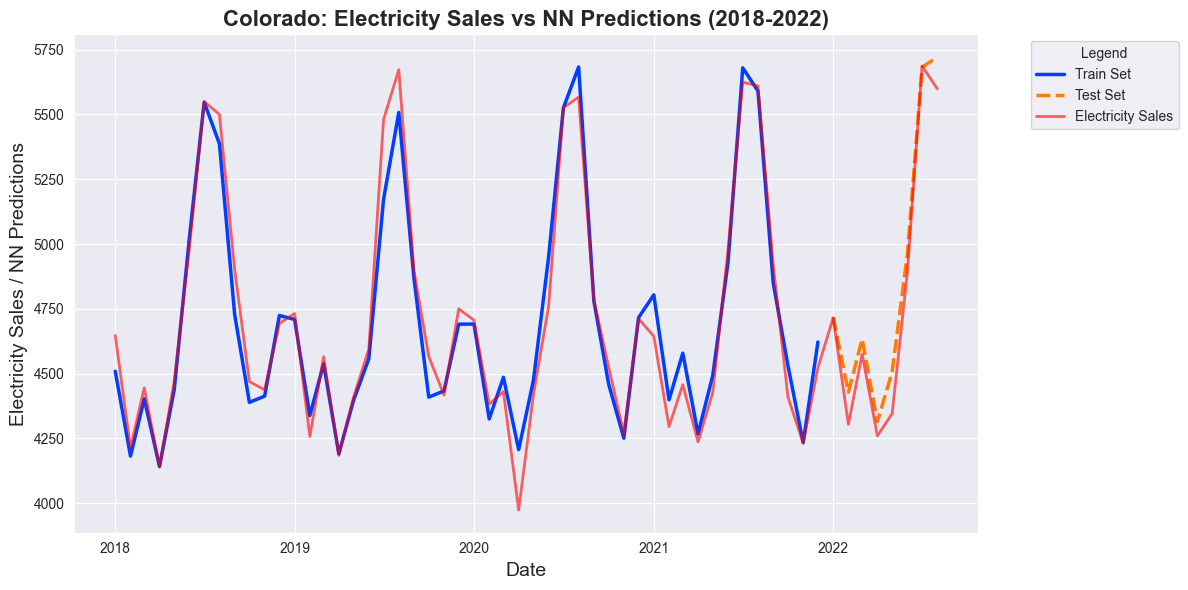

In [40]:
state = 'Colorado'


# Map True/False to custom labels
data_results['Test Set'] = data_results['Test Set'].replace({True: 'Test Set', False: 'Train Set'})

# Plot with updated labels
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Line plot for NN Predictions
sns.lineplot(
    data=data_results[(data_results['state'] == state) & (data_results['year'] >= 2018)],
    x='date',
    y='NN Predictions',
    hue='Test Set',
    style='Test Set',  # Different line styles for train/test sets
    palette='bright',  # Use bright colors
    linewidth=2.5
)

# Overlay line plot for actual electricity sales
sns.lineplot(
    data=data_results[(data_results['state'] == state) & (data_results['year'] >= 2018)],
    x='date',
    y='electricity_sales',
    color='red',
    alpha=0.6,
    linewidth=2.0,
    label='Electricity Sales'
)

# Add titles and labels
plt.title(f"{state}: Electricity Sales vs NN Predictions (2018-2022)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Electricity Sales / NN Predictions", fontsize=14)

# Adjust legend
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

# Question 2: Does Clean Power Plan Affect the Natural Gas Generation?


In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [43]:
usa_monthly_gas_gen = pd.read_csv('monthly_gas_gen.csv', header = 4)
usa_monthly_gas_gen

,description,units,source key,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,...,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024,May 2024,Jun 2024,Jul 2024,Aug 2024,Sep 2024
0,Net generation for natural gas,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,thousand megawatthours,ELEC.GEN.NG-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all sectors,thousand megawatthours,ELEC.GEN.NG-US-99.M,42389,37967,44364,45843,50934,57603,73030,...,149798,160174,130989,130609,121406,143621,169315,207735,203094,169382
3,United States : electric power,NaN,ELEC.GEN.NG-US-98.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States : electric utility,thousand megawatthours,ELEC.GEN.NG-US-1.M,15553,13533,16649,20528,22552,25724,34660,...,73156,78881,64788,65235,60563,74529,87604,108098,105130,86574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Hawaii : electric power,NaN,ELEC.GEN.NG-HI-98.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,Hawaii : electric utility,thousand megawatthours,ELEC.GEN.NG-HI-1.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
432,Hawaii : independent power producers,thousand megawatthours,ELEC.GEN.NG-HI-94.M,0,0,0,0,0,0,0,...,--,--,--,--,--,--,--,--,--,--
433,Hawaii : all commercial,thousand megawatthours,ELEC.GEN.NG-HI-96.M,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


Now making the monthly gas generation to yearly. 

In [44]:
usa_monthly_gas_gen.columns = usa_monthly_gas_gen.columns.str.strip()

monthly_columns = usa_monthly_gas_gen.columns[3:]

yearly_columns = {}
for col in monthly_columns:
    year = col.split()[1]  # Extracting the year from column name (e.g., 'Jan 2001' -> '2001')
    if year not in yearly_columns:
        yearly_columns[year] = []
    yearly_columns[year].append(col)


for year, cols in yearly_columns.items():
    usa_monthly_gas_gen[year] = usa_monthly_gas_gen[cols].sum(axis=1)

usa_gas_gen_yearly = usa_monthly_gas_gen.drop(columns=monthly_columns)

### - Yearly Gas Generation Amount

In [47]:
filtered_rows = usa_gas_gen_yearly[usa_gas_gen_yearly['description'] == 'United States : all sectors']

filtered_columns = filtered_rows.loc[:, '2001':]

USA_Gas_Yearly = pd.concat([filtered_rows[['description']], filtered_columns], axis=1)

USA_Gas_Yearly = pd.melt(USA_Gas_Yearly, 
                         id_vars=['description'], 
                         var_name='Year', 
                         value_name='Gas_Generation')
USA_Gas_Yearly = USA_Gas_Yearly.iloc[:-1, 1:]

USA_Gas_Yearly

,Year,Gas_Generation
0,2001,4238937967443644584350934576037303078410601815...
1,2002,4841344308512144914650275656318391784477681615...
2,2003,5017643547466994519549373544537693883250590905...
3,2004,4825350320498015182262022646867929077821678545...
4,2005,5133844913518975201654826756359681910078773355...
5,2006,4380747409549225609165586810601080941065927267...
6,2007,6147557622562046015366470815119748312133888532...
7,2008,7260060042621716304662270846201003219967379136...
8,2009,6639062139682036115968146842051018941092409212...
9,2010,7417366198634316464473665922681146241211519300...


### - Yearly GDP 

In [49]:
us_gdp_uncleaned= pd.read_csv('usa_gdp.csv', header=6)
us_gdp_uncleaned['Year'] = pd.to_datetime(us_gdp_uncleaned['Date']).dt.year

# Filter rows to keep only years from 2001 to 2023
filtered_df = us_gdp_uncleaned[(us_gdp_uncleaned['Year'] >= 2001) & (us_gdp_uncleaned['Year'] <= 2023)]

# Create a new DataFrame containing only the "Year" and "GDP (Billions of ...)" columns
USA_Gdp_Yearly = filtered_df[['Year', ' GDP (Billions of US $)']]
USA_Gdp_Yearly = USA_Gdp_Yearly.reset_index(drop=True)
USA_Gdp_Yearly

,Year,GDP (Billions of US $)
0,2001,10581.929
1,2002,10929.108
2,2003,11456.450
3,2004,12217.196
4,2005,13039.197
5,2006,13815.583
6,2007,14474.228
7,2008,14769.862
8,2009,14478.067
9,2010,15048.971


### - Yearly Temperature

In [50]:
years = [
    2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 
    2019, 2020, 2021, 2022, 2023
]
values = [
    53.8, 52.0, 55.0, 52.1, 53.4, 53.8, 53.8, 51.9, 52.1, 
    52.7, 51.8, 56.6, 53.3, 55.6, 56.3, 56.2, 56.1, 56.2, 
    53.6, 55.7, 56.3, 55.9, 55.6
]


Temperature = {
    'Year': years,
    'Value': values
}
USA_Temp_Yearly = pd.DataFrame(Temperature)
USA_Temp_Yearly

,Year,Value
0,2001,53.8
1,2002,52.0
2,2003,55.0
3,2004,52.1
4,2005,53.4
5,2006,53.8
6,2007,53.8
7,2008,51.9
8,2009,52.1
9,2010,52.7


### - Yearly Renewable Energy

In [51]:
re_years = [
    2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
    2019, 2020, 2021, 2022, 2023
]

re_values = [
    7.5, 8.7, 9.0, 8.7, 8.7, 9.4, 8.3, 9.1, 10.5, 10.3,
    12.4, 12.8, 12.8, 13.6, 15.2, 17.4, 17.4, 18.2, 20.3,
    20.3, 20.3, 22.5, 22.5
]

re_data = {
    'Year': re_years,
    'Value': re_values
}
USA_RenewEnergy_Yearly = pd.DataFrame(re_data)
USA_RenewEnergy_Yearly

,Year,Value
0,2001,7.5
1,2002,8.7
2,2003,9.0
3,2004,8.7
4,2005,8.7
5,2006,9.4
6,2007,8.3
7,2008,9.1
8,2009,10.5
9,2010,10.3


## Above is Data Cleaning.
## Now the Causal Inference will be conducted below

In [53]:
USA_Gas_Yearly['Year'] = USA_Gas_Yearly['Year'].astype(int)
USA_Gdp_Yearly['Year'] = USA_Gdp_Yearly['Year'].astype(int)
USA_Temp_Yearly['Year'] = USA_Temp_Yearly['Year'].astype(int)
USA_RenewEnergy_Yearly['Year'] = USA_RenewEnergy_Yearly['Year'].astype(int)

In [55]:
#  Merge all yearly data into a single dataframe on 'Year'
df = USA_Gas_Yearly.merge(USA_Gdp_Yearly, on='Year', how='left')
df = df.merge(USA_Temp_Yearly, on='Year', how='left')
df = df.merge(USA_RenewEnergy_Yearly, on='Year', how='left')
df

,Year,Gas_Generation,GDP (Billions of US $),Value_x,Value_y
0,2001,4238937967443644584350934576037303078410601815...,10581.929,53.8,7.5
1,2002,4841344308512144914650275656318391784477681615...,10929.108,52.0,8.7
2,2003,5017643547466994519549373544537693883250590905...,11456.450,55.0,9.0
3,2004,4825350320498015182262022646867929077821678545...,12217.196,52.1,8.7
4,2005,5133844913518975201654826756359681910078773355...,13039.197,53.4,8.7
5,2006,4380747409549225609165586810601080941065927267...,13815.583,53.8,9.4
6,2007,6147557622562046015366470815119748312133888532...,14474.228,53.8,8.3
7,2008,7260060042621716304662270846201003219967379136...,14769.862,51.9,9.1
8,2009,6639062139682036115968146842051018941092409212...,14478.067,52.1,10.5
9,2010,7417366198634316464473665922681146241211519300...,15048.971,52.7,10.3


## Now Create Intervention Variable (Clean Power Plan post-2015)

In [57]:
df['Post_Policy'] = (df['Year'] >= 2015).astype(int)
df

,Year,Gas_Generation,GDP (Billions of US $),Value_x,Value_y,Post_Policy
0,2001,4238937967443644584350934576037303078410601815...,10581.929,53.8,7.5,0
1,2002,4841344308512144914650275656318391784477681615...,10929.108,52.0,8.7,0
2,2003,5017643547466994519549373544537693883250590905...,11456.450,55.0,9.0,0
3,2004,4825350320498015182262022646867929077821678545...,12217.196,52.1,8.7,0
4,2005,5133844913518975201654826756359681910078773355...,13039.197,53.4,8.7,0
5,2006,4380747409549225609165586810601080941065927267...,13815.583,53.8,9.4,0
6,2007,6147557622562046015366470815119748312133888532...,14474.228,53.8,8.3,0
7,2008,7260060042621716304662270846201003219967379136...,14769.862,51.9,9.1,0
8,2009,6639062139682036115968146842051018941092409212...,14478.067,52.1,10.5,0
9,2010,7417366198634316464473665922681146241211519300...,15048.971,52.7,10.3,0


### Now we try OLS model

In [58]:
df['Post_Policy'] = (df['Year'] >= 2015).astype(int)

X = df[['Post_Policy', ' GDP (Billions of US $)']]
X = sm.add_constant(X)
y = df['Gas_Generation'].astype(float)  


model = sm.OLS(y, X).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Gas_Generation   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     17.19
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           4.53e-05
Time:                        13:39:57   Log-Likelihood:                -3767.2
No. Observations:                  23   AIC:                             7540.
Df Residuals:                      20   BIC:                             7544.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.384e+71   4.31e+70     -3.212      0.004   -2.28e+71   -4.85e+70
Post_Policy             -3.398e+69   2.77e+70     -0.123      0.904   -6.13e+70    5.45e+70
 GDP (Billions of US $)  9.826e+66   2.99e+66      3.292      0.004     3.6e+66    1.61e+67
==============================================================================
Omnibus:                        0.377   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.518
Skew:                           0.072   Prob(JB):                        0.772
Kurtosis:                       2.279   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Post_Policy (coefficient = -3.398e+69, p-value = 0.904):
### The coefficient for Post_Policy is not statistically significant (p-value > 0.05). This means that the implementation of the Clean Power Plan does not show a significant effect on the natural gas generation based on the available data. The p-value of 0.904 is very high, indicating that the observed effect could easily be due to chance.


### Now we try 2SLS

Endogenous variable: Gas_Generation<br>
Exogenous variable: Post_Policy<br>
Instrumental variable: GDP_Billions

In [59]:
from linearmodels.iv import IV2SLS

y = df['Gas_Generation'].astype(float)  
X = df[['Post_Policy']]  
Z = df[[' GDP (Billions of US $)']]  #
X = sm.add_constant(X)  

model_2sls = IV2SLS(y, X, None, Z).fit()

model_2sls_summary = model_2sls.summary
model_2sls_summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:         Gas_Generation   R-squared:                      0.4329
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4059
No. Observations:                  23   F-statistic:                    11.285
Date:                Mon, Dec 16 2024   P-value (F-stat)                0.0008
Time:                        13:42:00   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const        6.632e+63  6.239e+63     1.0630     0.2878  -5.596e+63   1.886e+64
Post_Policy  7.321e+70  2.179e+70     3.3594     0.0008    3.05e+70   1.159e+71
===============================================================================

Endogenous: 
Instruments:  GDP (Billions of US $)
Robust Covariance (Heteroskedastic)
Debiased: False
"""

### Post_Policy (coefficient = 7.321e+70, p-value = 0.0008):
### The coefficient for Post_Policy is positive and statistically significant at the 1% level (p-value < 0.01). This suggests that after the implementation of the Clean Power Plan, there was a significant increase in natural gas generation. The positive coefficient indicates that the Post_Policy variable has a strong effect on natural gas generation, and this effect is statistically robust.